### Project Charter - Fake News Prediction

**Project Title:** Fake News Prediction using Machine Learning  

**Problem Statement:**  
The spread of misinformation and fake news undermines public trust, fuels polarization, and can have serious consequences in politics, health, and society. Manual fact-checking is slow and cannot keep up with the massive volume of online content. There is a need for automated tools that can help classify news articles as fake or true.  

**Objectives:**  
- Build a machine learning model to classify news articles into FAKE or TRUE.  
- Analyze linguistic and structural patterns that distinguish fake from true reporting.  
- Establish baseline performance metrics for future improvements.  
- Provide interpretable outputs that can support content moderation and awareness.  

**Scope:**  
- Use a labeled dataset of fake and true news articles.  
- Apply natural language processing (NLP) methods such as TF-IDF and Logistic Regression for a baseline model.  
- Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.  
- Focus on **text content only** (no multimedia or source metadata).  

**Success Criteria:**  
- Achieve at least **80% accuracy** on test data.  
- Balanced **precision and recall** for both FAKE and TRUE classes.  
- A reproducible pipeline that can be extended to more advanced models.  


### Ethical Concerns

Building a Fake News Detection model involves important ethical considerations that must be acknowledged:

1. **Bias in Data**  
   - The dataset may reflect political, cultural, or regional biases depending on the sources chosen.  
   - If most fake articles are from one region or political leaning, the model may unfairly generalize.  

2. **Risk of Censorship**  
   - A model that flags content as “fake” could be misused for **silencing dissent** or limiting free speech.  
   - It is essential to frame the system as a **support tool**, not an absolute authority.  

3. **Transparency and Accountability**  
   - Users should understand the model’s limitations and decision boundaries.  
   - Explanations (e.g., why an article is flagged) are important for trust.  

4. **False Positives vs False Negatives**  
   - **False Positives (True news flagged as Fake):** harms media credibility and public trust.  
   - **False Negatives (Fake news missed):** allows misinformation to spread unchecked.  
   - The trade-off between these errors must be carefully balanced.  

5. **Responsible Use**  
   - This model should be a starting point for **awareness and research**, not the final word in content moderation.  
   - Final decisions should always involve **human oversight** to avoid misuse.  


### Domain Context

Fake news is not a new phenomenon, but the **digital age and social media** have amplified its reach and speed of spread. Platforms such as Facebook, Twitter (X), and WhatsApp make it easy for misinformation to go viral within minutes, often reaching millions before fact-checkers can intervene.  

#### Why fake news matters
- **Politics:** Fake stories can shape public opinion, influence elections, and undermine democratic processes.  
- **Health:** Misinformation about vaccines, pandemics, or treatments can lead to dangerous public health outcomes.  
- **Society:** Fake news erodes trust in journalism and institutions, fueling polarization and confusion.  

#### Why it’s challenging
- Fake articles often **mimic the style of real news**, making manual detection difficult.  
- The volume of online content is too high for human moderators alone.  
- Fake news creators frequently adapt, changing words and formats to avoid detection.  

#### Relevance to this project
- This dataset contains thousands of labeled **fake** and **true** articles, providing a foundation to study how machine learning can help in detection.  
- By analyzing **linguistic features** (words, phrases, structure), we can build models that learn the patterns distinguishing credible from misleading content.  
- Insights from the project can inform media organizations, social platforms, and policymakers in designing **responsible content moderation strategies**.  


## Dataset Exploration and Understanding

In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")
    
print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
import os  # import the os module first

# List files in the folder
os.listdir("unzipped_data")


['Fake.csv', 'True.csv']

In [ ]:
os.listdir("unzipped_data")

['Fake.csv', 'True.csv']

In [ ]:
import pandas as pd

fake_df = pd.read_csv("unzipped_data/Fake.csv")
true_df = pd.read_csv("unzipped_data/True.csv")

print("Fake News Dataset:", fake_df.shape)
print("True News Dataset:", true_df.shape)

fake_df.head()

Fake News Dataset: (23481, 4)
True News Dataset: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#merge and label

#Add a label column
fake_df["label"] = "FAKE"
true_df["label"] = "TRUE"

#Merge into one dataset
data = pd.concat([fake_df, true_df], ignore_index = True)

#Shuffle the rows so FAKE and TRUE are mixed
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#Check the structure
print(data.shape)
print(data["label"].value_counts())
data.head()

(44898, 5)
label
FAKE    23481
TRUE    21417
Name: count, dtype: int64


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",TRUE
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",TRUE
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",TRUE


In [ ]:
#Basic overview of the merged data

#structure
data.info()

#Number of articles in each class
data['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


label
FAKE    23481
TRUE    21417
Name: count, dtype: int64

In [ ]:
# check for missing values
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
#Text length analysis

#Add a column for word count
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

#Summary statistics
data['word_count'].describe()

#Compare FAKE vs TRUE word counts
data.groupby('label')['word_count'].mean()

label
FAKE    423.197905
TRUE    385.640099
Name: word_count, dtype: float64

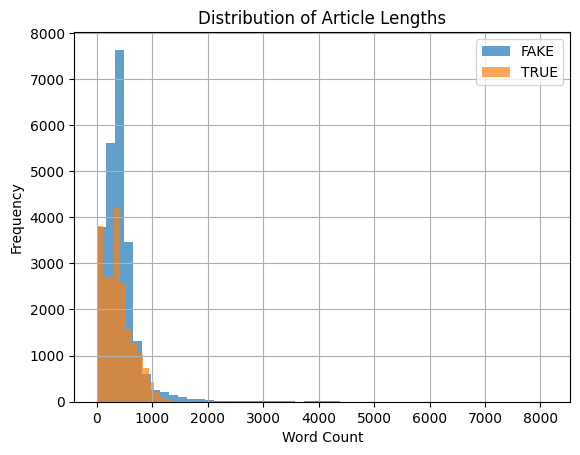

In [ ]:
#Visualizing distributions
import matplotlib.pyplot as plt

#Histogram of word counts by label
data[data['label']=="FAKE"]['word_count'].hist(alpha=0.7, bins=50, label='FAKE')
data[data['label']=="TRUE"]['word_count'].hist(alpha=0.7, bins=50, label='TRUE')
plt.legend()
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Article Lengths")
plt.show()

#### MY PART

#### Class Distribution Analysis

Before training the model, it is important to examine the distribution of the target classes. An imbalanced dataset e.g., 90% FAKE and 10% TRUE could bias the model toward the majority class, resulting in misleading accuracy and poor generalization. Ensuring balance is therefore critical for fair and reliable predictions.

1. Raw Class Counts


In [ ]:
data['label'].value_counts()


label
FAKE    23481
TRUE    21417
Name: count, dtype: int64

The dataset contains 23,481 fake news articles and 21,417 true news articles.This results in a total of 44,898 articles.

FAKE : 23,481  (~52.3%)
TRUE : 21,417  (~47.7%)

2. Percentage Distribution

In [ ]:
data['label'].value_counts(normalize=True) * 100


label
FAKE    52.298543
TRUE    47.701457
Name: proportion, dtype: float64



When converted into percentages, the class proportions are:

FAKE → 52.3%

TRUE → 47.7%

This shows that the dataset is almost evenly balanced, with only a slight skew toward fake article


3. Visualization


C:\Users\user\AppData\Local\Temp\ipykernel_11160\2253211797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


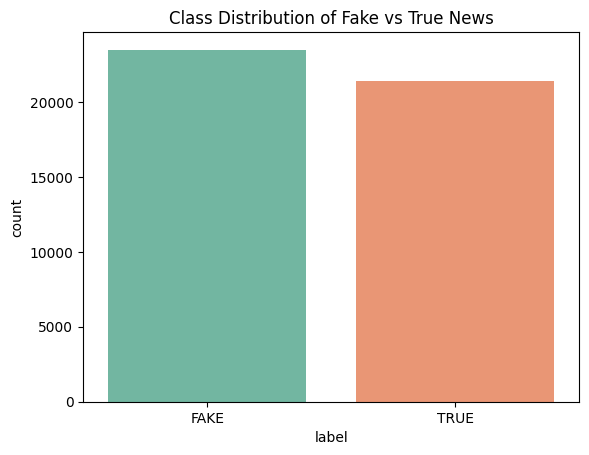

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data, palette='Set2')
plt.title("Class Distribution of Fake vs True News")
plt.show()



A bar plot of the distribution highlights the balance:

Both bars (FAKE vs TRUE) are nearly equal in height.

There is no severe dominance of one class over the other.


4. Why Class Balance Matters

The class distribution is critical for machine learning classification tasks:

If the dataset was heavily imbalanced e.g. 90% TRUE vs 10% FAKE, a model could achieve 90% accuracy by always predicting TRUE, but such a model would be useless in practice.

Here, with a ~52/48 split, the baseline accuracy of random guessing is close to 50%, meaning our models must perform significantly better than chance to be useful.

5. Implications for Modeling

Since the dataset is balanced, we can proceed with standard train/test splitting without needing resampling techniques like SMOTE Synthetic Minority Oversampling Technique or undersampling.

Evaluation metrics such as Accuracy, Precision, Recall, and F1-score will be meaningful, because neither class is underrepresented.

Models won’t need special handling like class_weight='balanced' at this stage, though testing it may still be worthwhile later.



✅ Conclusion

The Fake News dataset provides a balanced distribution of FAKE and TRUE articles. This balance ensures that classification models trained on this data will not inherently favor one label over the other, allowing for a fair and unbiased evaluation of algorithm performance.

The slight overrepresentation of fake articles (~52%) may even be beneficial, as catching fake news (recall for FAKE) is often more critical in real-world applications than misclassifying a small portion of true news.